In [391]:
import pandas as pd

In [392]:
df = pd.DataFrame({'Age': [36, 48, 50, 44, 29, 40, 38, 
53, 40, 52, 53, 40, 43, 33, 36, 41, 29, 38, 37, 41, 46,
26, 31, 45, 39, 49, 46, 33, 51, 48, 32, 28, 40, 49, 41,
37, 26, 39, 35, 40]})

In [393]:
import matplotlib.pyplot as plt
import numpy as np

In [394]:
df.min()

Age    26
dtype: int64

In [395]:
df.max()

Age    53
dtype: int64

In [396]:
df['Age'].size

40

### 계급수가 5일 때

#### 계급폭은 6이다.

#### 히스토그램

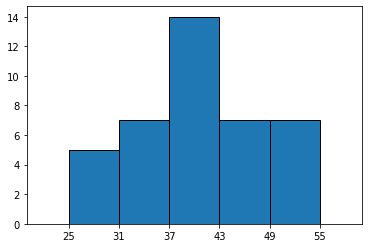

In [397]:
plt.hist(df['Age'], bins=np.arange(25, 60, 6), edgecolor='black', linewidth=1)
plt.xticks(np.arange(25, 60, 6))
plt.xlim(20, 60)
plt.savefig("./5.png")

In [398]:
df = df.sort_values(by='Age', axis=0, ascending=True)

In [399]:
bins = list(np.arange(25, 60, 6))

In [400]:
labels = ['25~31', '31~37', '37~43', '43~49', '49~55']

In [401]:
hist = pd.DataFrame(pd.cut(df['Age'], bins=bins, right=False, labels=labels)).rename(columns={'Age' : '계급'})

In [402]:
table_count = hist.value_counts(sort=False)

In [403]:
table = table_count.rename_axis('계급').reset_index(name='도수')

In [404]:
total = table.loc[:, ['도수']].sum(axis=0)

In [405]:
total.name = '합계'

In [406]:
table = table.append(total.transpose())

### 도수분포표

In [407]:
table

,계급,도수
0,25~31,5.0
1,31~37,7.0
2,37~43,14.0
3,43~49,7.0
4,49~55,7.0
합계,NaN,40.0


In [408]:
table['도수'].drop(['합계'], axis=0).sum()

40.0

### 상대도수분포표

In [409]:
table['상대도수'] = table['도수'].div(table['도수'].drop(['합계'], axis=0).sum()).round(3)

In [410]:
table = table.drop(['도수'], axis=1)

In [411]:
table

,계급,상대도수
0,25~31,0.125
1,31~37,0.175
2,37~43,0.350
3,43~49,0.175
4,49~55,0.175
합계,NaN,1.000


#### 상대도수분포도

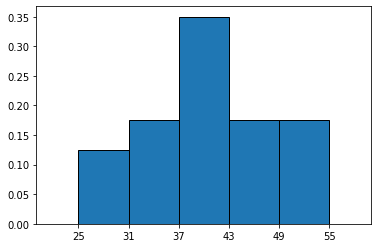

In [412]:
plt.hist(df['Age'], bins=np.arange(25, 60, 6), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, edgecolor='black', linewidth=1)
plt.xticks(np.arange(25, 60, 6))
plt.xlim(20, 60)
plt.savefig("./5_relative.png")

### 누적상대도수분포표

In [413]:
table['누적상대도수'] = table['상대도수'].cumsum()

In [414]:
table['누적상대도수'].iloc[-1] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [415]:
table

,계급,상대도수,누적상대도수
0,25~31,0.125,0.125
1,31~37,0.175,0.300
2,37~43,0.350,0.650
3,43~49,0.175,0.825
4,49~55,0.175,1.000
합계,NaN,1.000,NaN


#### 누적상대도수분포도

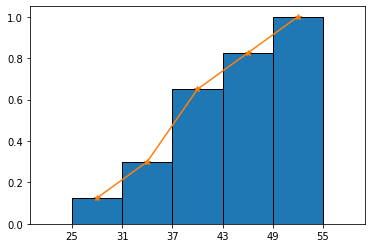

In [416]:
counts, bins, bars = plt.hist(df['Age'], bins=np.arange(25, 60, 6), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, cumulative=1, edgecolor='black', linewidth=1)
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25, 60, 6))
plt.xlim(20, 60)
plt.savefig("./5_relative_cum.png")

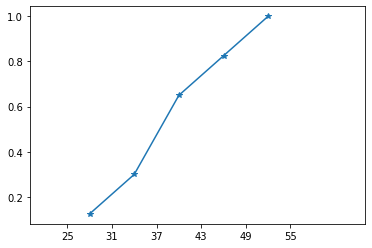

In [417]:
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25, 60, 6))
plt.xlim(20, 65)
plt.savefig("./5_relative_cum_alone.png")

### 계급수가 6일 때

#### 계급폭은 5이다.

#### 히스토그램

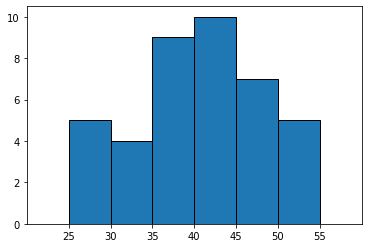

In [418]:
plt.hist(df['Age'], bins=np.arange(25, 60, 5), edgecolor='black', linewidth=1)
plt.xticks(np.arange(25, 60, 5))
plt.xlim(20, 60)
plt.savefig("./6.png")

In [419]:
df = df.sort_values(by='Age', axis=0, ascending=True)

In [420]:
bins = list(np.arange(25, 60, 5))

In [421]:
labels = ['25~30', '30~35', '35~40', '40~45', '45~50', '50~55']

In [422]:
hist = pd.DataFrame(pd.cut(df['Age'], bins=bins, right=False, labels=labels)).rename(columns={'Age' : '계급'})

In [423]:
table_count = hist.value_counts(sort=False)

In [424]:
table = table_count.rename_axis('계급').reset_index(name='도수')

In [425]:
total = table.loc[:, ['도수']].sum(axis=0)

In [426]:
total.name = '합계'

In [427]:
table = table.append(total.transpose())

### 도수분포표

In [428]:
table

,계급,도수
0,25~30,5.0
1,30~35,4.0
2,35~40,9.0
3,40~45,10.0
4,45~50,7.0
5,50~55,5.0
합계,NaN,40.0


In [429]:
table['도수'].drop(['합계'], axis=0).sum()

40.0

### 상대도수분포표

In [430]:
table['상대도수'] = table['도수'].div(table['도수'].drop(['합계'], axis=0).sum()).round(3)

In [431]:
table = table.drop(['도수'], axis=1)

In [432]:
table

,계급,상대도수
0,25~30,0.125
1,30~35,0.100
2,35~40,0.225
3,40~45,0.250
4,45~50,0.175
5,50~55,0.125
합계,NaN,1.000


#### 상대도수분포도

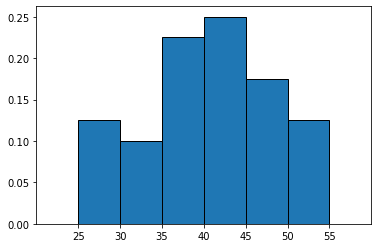

In [433]:
plt.hist(df['Age'], bins=np.arange(25, 60, 5), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, edgecolor='black', linewidth=1)
plt.xticks(np.arange(25, 60, 5))
plt.xlim(20, 60)
plt.savefig("./6_relative.png")

### 누적상대도수분포표

In [434]:
table['누적상대도수'] = table['상대도수'].cumsum()

In [435]:
table['누적상대도수'].iloc[-1] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [436]:
table

,계급,상대도수,누적상대도수
0,25~30,0.125,0.125
1,30~35,0.100,0.225
2,35~40,0.225,0.450
3,40~45,0.250,0.700
4,45~50,0.175,0.875
5,50~55,0.125,1.000
합계,NaN,1.000,NaN


#### 누적상대도수분포도

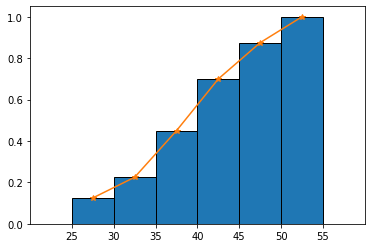

In [437]:
counts, bins, bars = plt.hist(df['Age'], bins=np.arange(25, 60, 5), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, cumulative=1, edgecolor='black', linewidth=1)
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25, 60, 5))
plt.xlim(20, 60)
plt.savefig("./6_relative_cum.png")

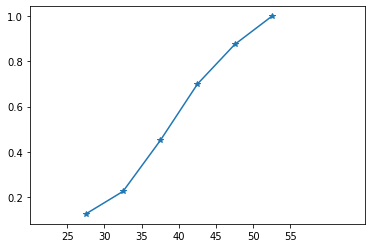

In [438]:
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25, 60, 5))
plt.xlim(20, 65)
plt.savefig("./6_relative_cum_alone.png")

### 계급수가 7일 때

#### 계급폭은 4이다.

#### 히스토그램

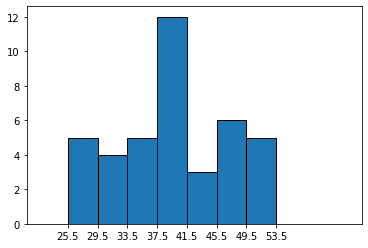

In [439]:
plt.hist(df['Age'], bins=np.arange(25.5, 55, 4), edgecolor='black', linewidth=1)
plt.xticks(np.arange(25.5, 55, 4))
plt.xlim(20, 65)
plt.savefig("./7.png")

In [440]:
df = df.sort_values(by='Age', axis=0, ascending=True)

In [441]:
bins = list(np.arange(25.5, 55, 4))

In [442]:
labels = ['25.5~29.5', '29.5~33.5', '33.5~37.5', '37.5~41.5', '41.5~45.5', '45.5~49.5', '49.5~53.5']

In [443]:
hist = pd.DataFrame(pd.cut(df['Age'], bins=bins, right=False, labels=labels)).rename(columns={'Age' : '계급'})

In [444]:
table_count = hist.value_counts(sort=False)

In [445]:
table = table_count.rename_axis('계급').reset_index(name='도수')

In [446]:
total = table.loc[:, ['도수']].sum(axis=0)

In [447]:
total.name = '합계'

In [448]:
table = table.append(total.transpose())

### 도수분포표

In [449]:
table

,계급,도수
0,25.5~29.5,5.0
1,29.5~33.5,4.0
2,33.5~37.5,5.0
3,37.5~41.5,12.0
4,41.5~45.5,3.0
5,45.5~49.5,6.0
6,49.5~53.5,5.0
합계,NaN,40.0


In [450]:
table['도수'].drop(['합계'], axis=0).sum()

40.0

### 상대도수분포표

In [451]:
table['상대도수'] = table['도수'].div(table['도수'].drop(['합계'], axis=0).sum()).round(3)

In [452]:
table = table.drop(['도수'], axis=1)

In [453]:
table

,계급,상대도수
0,25.5~29.5,0.125
1,29.5~33.5,0.100
2,33.5~37.5,0.125
3,37.5~41.5,0.300
4,41.5~45.5,0.075
5,45.5~49.5,0.150
6,49.5~53.5,0.125
합계,NaN,1.000


#### 상대도수분포도

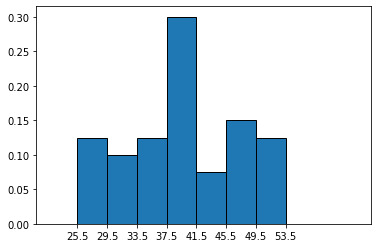

In [454]:
plt.hist(df['Age'], bins=np.arange(25.5, 55, 4), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, edgecolor='black', linewidth=1)
plt.xticks(np.arange(25.5, 55, 4))
plt.xlim(20, 65)
plt.savefig("./7_relative.png")

### 누적상대도수분포표

In [455]:
table['누적상대도수'] = table['상대도수'].cumsum()

In [456]:
table['누적상대도수'].iloc[-1] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [457]:
table

,계급,상대도수,누적상대도수
0,25.5~29.5,0.125,0.125
1,29.5~33.5,0.100,0.225
2,33.5~37.5,0.125,0.350
3,37.5~41.5,0.300,0.650
4,41.5~45.5,0.075,0.725
5,45.5~49.5,0.150,0.875
6,49.5~53.5,0.125,1.000
합계,NaN,1.000,NaN


#### 누적상대도수분포도

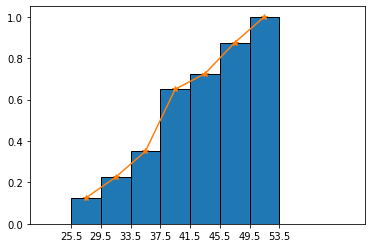

In [458]:
counts, bins, bars = plt.hist(df['Age'], bins=np.arange(25.5, 55, 4), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, cumulative=1, edgecolor='black', linewidth=1)
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25.5, 55, 4))
plt.xlim(20, 65)
plt.savefig("./7_relative_cum.png")

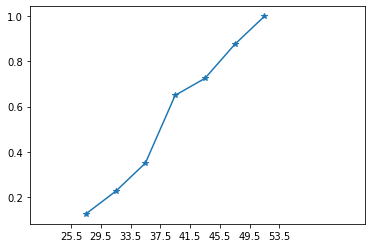

In [459]:
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25.5, 55, 4))
plt.xlim(20, 65)
plt.savefig("./7_relative_cum_alone.png")

### 계급수가 8일 때

#### 계급폭은 3.5이다.

#### 히스토그램

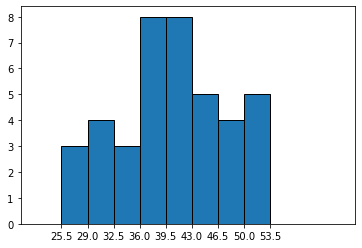

In [460]:
plt.hist(df['Age'], bins=np.arange(25.5, 54, 3.5), edgecolor='black', linewidth=1)
plt.xticks(np.arange(25.5, 54, 3.5))
plt.xlim(20, 65)
plt.savefig("./8.png")

In [461]:
df = df.sort_values(by='Age', axis=0, ascending=True)

In [462]:
bins = list(np.arange(25.5, 54, 3.5))

In [463]:
labels = ['25.5~29.0', '29.0~32.5', '32.5~36.0', '36.0~39.5', '39.5~43.0', '43.0~46.5', '46.5~50.0', '50.0~53.5']

In [464]:
hist = pd.DataFrame(pd.cut(df['Age'], bins=bins, right=False, labels=labels)).rename(columns={'Age' : '계급'})

In [465]:
table_count = hist.value_counts(sort=False)

In [466]:
table = table_count.rename_axis('계급').reset_index(name='도수')

In [467]:
total = table.loc[:, ['도수']].sum(axis=0)

In [468]:
total.name = '합계'

In [469]:
table = table.append(total.transpose())

### 도수분포표

In [470]:
table

,계급,도수
0,25.5~29.0,3.0
1,29.0~32.5,4.0
2,32.5~36.0,3.0
3,36.0~39.5,8.0
4,39.5~43.0,8.0
5,43.0~46.5,5.0
6,46.5~50.0,4.0
7,50.0~53.5,5.0
합계,NaN,40.0


In [471]:
table['도수'].drop(['합계'], axis=0).sum()

40.0

### 상대도수분포표

In [472]:
table['상대도수'] = table['도수'].div(table['도수'].drop(['합계'], axis=0).sum()).round(3)

In [473]:
table = table.drop(['도수'], axis=1)

In [474]:
table

,계급,상대도수
0,25.5~29.0,0.075
1,29.0~32.5,0.100
2,32.5~36.0,0.075
3,36.0~39.5,0.200
4,39.5~43.0,0.200
5,43.0~46.5,0.125
6,46.5~50.0,0.100
7,50.0~53.5,0.125
합계,NaN,1.000


#### 상대도수분포도

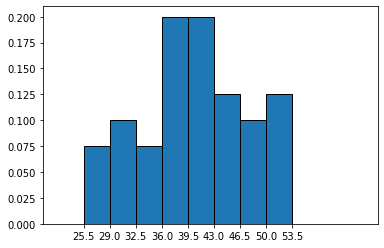

In [475]:
plt.hist(df['Age'], bins=np.arange(25.5, 54, 3.5), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, edgecolor='black', linewidth=1)
plt.xticks(np.arange(25.5, 54, 3.5))
plt.xlim(20, 65)
plt.savefig("./8_relative.png")

### 누적상대도수분포표

In [476]:
table['누적상대도수'] = table['상대도수'].cumsum()

In [477]:
table['누적상대도수'].iloc[-1] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [478]:
table

,계급,상대도수,누적상대도수
0,25.5~29.0,0.075,0.075
1,29.0~32.5,0.100,0.175
2,32.5~36.0,0.075,0.250
3,36.0~39.5,0.200,0.450
4,39.5~43.0,0.200,0.650
5,43.0~46.5,0.125,0.775
6,46.5~50.0,0.100,0.875
7,50.0~53.5,0.125,1.000
합계,NaN,1.000,NaN


#### 누적상대도수분포도

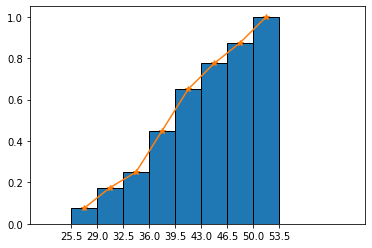

In [479]:
counts, bins, bars = plt.hist(df['Age'], bins=np.arange(25.5, 54, 3.5), weights=np.zeros_like(df['Age']) + 1./df['Age'].size, cumulative=1, edgecolor='black', linewidth=1)
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25.5, 54, 3.5))
plt.xlim(20, 65)
plt.savefig("./8_relative_cum.png")

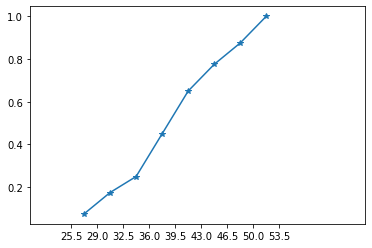

In [480]:
centers = 0.5*(bins[1:] + bins[:-1])

plt.plot(centers, counts, "-*")
plt.xticks(np.arange(25.5, 54, 3.5))
plt.xlim(20, 65)
plt.savefig("./8_relative_cum_alone.png")

# 줄기-잎 그림

In [481]:
from stemgraphic import stem_graphic

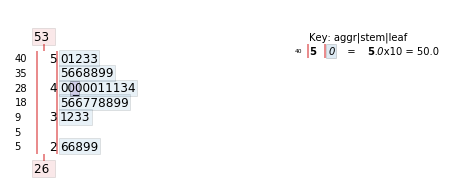

In [482]:
fig, ax = stem_graphic(df['Age'])
fig.savefig("./stem_and_leaf.png")